# Projeto 1: Classificação binária brest cancer

## Etapa 1: Importação das bibliotecas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
import torch
torch.__version__
#!pip install torch==1.4.0

'1.9.0+cu111'

In [3]:
import torch.nn as nn

## Etapa 2: Base de dados

In [4]:
np.random.seed(123)
torch.manual_seed(123)

In [5]:
previsores = pd.read_csv("/content/entradas_breast.csv")
classe = pd.read_csv("/content/saidas_breast.csv")

In [6]:
previsores.shape

(569, 30)

In [7]:
classe.shape

(569, 1)

In [8]:
np.unique(classe)

array([0, 1])

In [9]:
previsores.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1095.0000,0.9053,8589.0,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3398.0,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4585.0,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1156.0000,3445.0,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,0.7572,0.7813,5438.0,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [10]:
classe.head()

,0
0,0
1,0
2,0
3,0
4,0


In [11]:
np.unique(classe)

array([0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


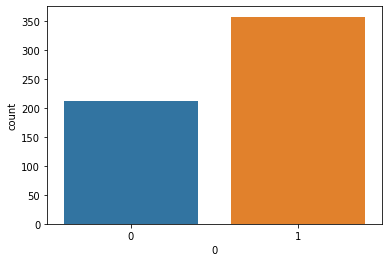

In [12]:
sns.countplot(classe['0']);

In [13]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size = 0.25)

In [14]:
previsores_treinamento.shape

(426, 30)

In [15]:
classe_treinamento.shape

(426, 1)

In [16]:
previsores_teste.shape

(143, 30)

In [17]:
classe_teste.shape

(143, 1)

## Etapa 3: Transformação dos dados para tensores


In [18]:
type(previsores_treinamento)

pandas.core.frame.DataFrame

In [19]:
# Para poder trabalhar em pytorch, precisamos converter em tensores
# Para poder converter em tensores, precisamos que seja antes um numpy array
type(np.array(previsores_treinamento))

numpy.ndarray

In [20]:
# Aqui faremos a conversão para tensores
previsores_treinamento = torch.tensor(np.array(previsores_treinamento))
classe_treinamento = torch.tensor(np.array(classe_treinamento))

In [21]:
previsores_treinamento

tensor([[1.1540e+01, 1.4440e+01, 7.4650e+01,  ..., 6.9180e-02, 2.3290e-01,
         8.1340e-02],
        [2.0310e+01, 2.7060e+01, 1.3290e+02,  ..., 1.6970e-01, 3.1510e-01,
         7.9990e-02],
        [1.1360e+01, 1.7570e+01, 7.2490e+01,  ..., 8.6980e-02, 2.9730e-01,
         7.7450e-02],
        ...,
        [1.2050e+01, 2.2720e+01, 7.8750e+01,  ..., 1.0920e-01, 2.1910e-01,
         9.3490e-02],
        [2.0440e+01, 2.1780e+01, 1.3380e+02,  ..., 1.7650e-01, 2.6090e-01,
         6.7350e-02],
        [1.1740e+01, 1.4690e+01, 7.6310e+01,  ..., 1.0560e-01, 2.6040e-01,
         9.8790e-02]], dtype=torch.float64)

In [22]:
classe_treinamento

tensor([[1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],

In [23]:
type(previsores_treinamento)

torch.Tensor

In [24]:
type(classe_treinamento)

torch.Tensor

In [25]:
# Para o PyTorch é necessário que em um único objeto haja previsores e classe. Para isso, você usa o 
# torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)
# Ao fazer isso, você já gera um tensor no formato esperado

df = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)


In [26]:
type(df)

torch.utils.data.dataset.TensorDataset

In [27]:
# Px passo é gerar o train loader que fará o treinamento da rede
# Para isso, precisamos informar a qtd de batchs que serão usados por época de treinamento e o shuffle se vamos alternar
train_loader = torch.utils.data.DataLoader(df, batch_size=10, shuffle=True)

## Etapa 4: Construção do modelo

In [28]:
# Aqui construíremos a RN

# Temos 30 atributos
# 1 Saída
# Qtd de neurônios na camada oculta será: (entrada + saída) / 2 
# 31 / 2 =~ 16 neurônios
# Utilizaremos 2 camadas ocultas inicialmente, logo, arquitetura da rede será:
# 30 -> 16 -> 16 ->1

# Sequential é a instanciação da rede toda, mostrando que os passos seguintes serão sequenciais 
# Seria como o density do TensorFlow ou Keras
rede_neural = nn.Sequential(   
    # Ao instanciarmos uma camada Linear, indicamos que todos os neurônios desta camada se comunicam com todos da px camada
    # Como temos 30 atributos, a primeira camada será 30 -> 16
    nn.Linear(in_features=30,out_features=16),
    # Agora precisamos definir a função de ativação para a saída dos 16
    nn.ReLU(),
    
    # Agora faremos 16 -> 16
    nn.Linear(in_features=16,out_features=16),
    # Outra vez a função de ativação para o que passará para os últimos 16
    nn.ReLU(),

    # Agora faremos 16 -> 1
    nn.Linear(in_features=16,out_features=1),
    # Utilizaremos sigmoid para uma probabilidade de chegar no último neurônio da rede
    nn.Sigmoid()
)

In [29]:
# A rede.parameters apresenta os parâmetros da rede

rede_neural.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [30]:
# Precisamos agora instanciar o critério de perda
# BCE é Binary Cross Entropy

criterion = nn.BCELoss()

In [31]:
# Precisamos definir o optimizador que buscará a melhor descida do gradiente
# Há diversos optimizadores no PyTorch, utilizaremos o Adam()
# Precisamos passar: 
# Os parâmetros da rede;
# A learning rate do gradiente para o quanto ele descerá em cada época (padrão 0.001)
# A taxa de decaimento (padrão 0.0001) também para a descida mais íngreme do gradiente

optimizer = torch.optim.Adam(rede_neural.parameters(), lr = 0.001, weight_decay=0.0001)

## Etapa 5: Treinamento do modelo

In [32]:
# Precisaremos gerar um loop para a quantidade de épocas que ele pretende percorrer
for epoch in range(300):
  # Precisamos instanciar a primeira running_loss
  running_loss = 0.

  # Para cada batch do train_loader faremos a execução da rede
  for data in train_loader:
    inputs, labels = data
    #print(inputs) # Podemos ver que estamos percorrendo cada um dos 10 batchs de atributos previsores
    #print("-------")
    #print(labels) # E suas respectivas classes
    
    # Para cada ajuste de pesos precisamos calcular um gradiente separado. Então, precisamos zerar o gradiente
    optimizer.zero_grad()

    # Aqui passaremos a diante na rede as saídas outputs, 2 formas de fazer:
    # 1)
    # outputs = rede_neural(inputs)
    # 2) Neste caso tb foi necessário converter o tipo de dados
    outputs = rede_neural.forward(inputs.float())
    #print(outputs)

    # Aplicamos também a função de perda. Precisamos comparar as saídas com os dados reais.
    # Neste caso, foi necessário converter os dados
    # A cada batch teremos o erro
    loss = criterion(outputs.float(), labels.float())
    #print(loss)

    # Aplicamos a função de perda na backpropagation para melhorar o acerto
    loss.backward()

    # Aqui utilizaremos nosso otimizador Adan para fazer o ajuste dos pesos
    optimizer.step()

    # Pegamos o erro corrente
    running_loss += loss.item()

  print('Época %3d: perda %.5f' % (epoch+1, running_loss/len(train_loader)))




Época   1: perda 10.78336
Época   2: perda 2.84863
Época   3: perda 1.67480
Época   4: perda 1.11414
Época   5: perda 0.63996
Época   6: perda 0.63753
Época   7: perda 0.58066
Época   8: perda 0.55460
Época   9: perda 0.55617
Época  10: perda 0.53322
Época  11: perda 0.55797
Época  12: perda 0.53816
Época  13: perda 0.52938
Época  14: perda 0.33227
Época  15: perda 0.51360
Época  16: perda 0.35532
Época  17: perda 0.49602
Época  18: perda 0.33208
Época  19: perda 0.29349
Época  20: perda 0.25046
Época  21: perda 0.29527
Época  22: perda 0.49888
Época  23: perda 0.47241
Época  24: perda 0.45883
Época  25: perda 0.27544
Época  26: perda 0.23399
Época  27: perda 0.26373
Época  28: perda 0.24136
Época  29: perda 0.28275
Época  30: perda 0.22633
Época  31: perda 0.19294
Época  32: perda 0.22258
Época  33: perda 0.20290
Época  34: perda 0.20888
Época  35: perda 0.20335
Época  36: perda 0.20316
Época  37: perda 0.18855
Época  38: perda 0.22316
Época  39: perda 0.23315
Época  40: perda 0.19261

## Etapa 6: Visualização dos pesos

In [33]:
# A estrutura da rede é:
# 30 -> 16 -> 16 -> 1
# Com o parameters, podemos visualizar todos os parâmetros da rede
params = list(rede_neural.parameters())

In [34]:
#Parâmetros da rede
params

[Parameter containing:
 tensor([[-1.5219e-01, -2.8663e-01, -2.7835e-01,  9.7514e-02, -2.5460e-02,
           1.3026e-01,  5.4066e-02,  4.5641e-02, -1.3902e-01,  2.2695e-01,
           3.7599e-02,  5.3864e-02, -1.2807e-01, -4.9886e-02,  5.1757e-04,
          -2.5215e-01, -5.4503e-01, -2.3041e-02,  3.3099e-01,  2.1247e-03,
           3.5348e-02, -2.7691e-01, -1.4833e-01,  1.3639e-01,  7.6148e-01,
           1.0100e-01, -4.5419e-01,  8.2761e-02,  2.9650e-01,  1.6057e-01],
         [ 3.0091e-01,  1.5744e-01,  4.4858e-01,  9.5206e-02, -6.7210e-01,
          -9.2926e-02, -6.0004e-02, -2.7866e-01, -6.3077e-02,  2.3376e-01,
          -2.2981e-02, -5.2111e-02, -2.9425e-02,  1.7792e-01, -1.4984e-02,
           2.5385e-02,  1.0317e-01,  3.5367e-02, -2.4259e-01, -2.0004e-02,
           2.2576e-01, -9.8207e-02,  3.1511e-01, -1.8928e-03, -1.2241e-01,
          -2.6312e-01, -2.7559e-01, -4.0362e-02, -1.0538e-01, -1.8205e-01],
         [-3.8333e-02, -1.3197e-01, -3.0389e-01, -1.1665e-01, -3.2271e-04,


In [35]:
len(params)

6

In [36]:
# A posição 0 corresponde aos pesos da conexão da camada de entrada com primeira oculta
# 30 -> 16

pesos0 = params[0]
print("Qtd de conexões: ")
print(pesos0.shape)
print("------------")
print("Pesos encontrados na conexão da camada de entrada com primeira oculta: ")
print(pesos0)

Qtd de conexões: 
torch.Size([16, 30])
------------
Pesos encontrados na conexão da camada de entrada com primeira oculta: 
Parameter containing:
tensor([[-1.5219e-01, -2.8663e-01, -2.7835e-01,  9.7514e-02, -2.5460e-02,
          1.3026e-01,  5.4066e-02,  4.5641e-02, -1.3902e-01,  2.2695e-01,
          3.7599e-02,  5.3864e-02, -1.2807e-01, -4.9886e-02,  5.1757e-04,
         -2.5215e-01, -5.4503e-01, -2.3041e-02,  3.3099e-01,  2.1247e-03,
          3.5348e-02, -2.7691e-01, -1.4833e-01,  1.3639e-01,  7.6148e-01,
          1.0100e-01, -4.5419e-01,  8.2761e-02,  2.9650e-01,  1.6057e-01],
        [ 3.0091e-01,  1.5744e-01,  4.4858e-01,  9.5206e-02, -6.7210e-01,
         -9.2926e-02, -6.0004e-02, -2.7866e-01, -6.3077e-02,  2.3376e-01,
         -2.2981e-02, -5.2111e-02, -2.9425e-02,  1.7792e-01, -1.4984e-02,
          2.5385e-02,  1.0317e-01,  3.5367e-02, -2.4259e-01, -2.0004e-02,
          2.2576e-01, -9.8207e-02,  3.1511e-01, -1.8928e-03, -1.2241e-01,
         -2.6312e-01, -2.7559e-01, -4.0

In [37]:
# A posição do params 1 corresponderá ao bias do viés que foi colocado em nossa conexão
# 16 
bias0 = params[1]

# São colocados 1 bias enviezando cada um dos neurônios
print("Qtd de bias: ")
print(bias0.shape)
print("Pesos dos bias: ")
print(bias0)

Qtd de bias: 
torch.Size([16])
Pesos dos bias: 
Parameter containing:
tensor([-2.8432e-01,  5.9234e-01, -9.0008e-02, -3.5412e-01, -9.9234e-01,
         2.1540e-01,  3.8939e-01, -4.1536e-01, -7.2422e-01,  6.1096e-01,
        -2.0880e-01,  5.5659e-01, -2.1991e-01, -1.3701e-01, -3.1705e-39,
        -2.4359e-39], requires_grad=True)


In [38]:
# A posição 2 do params serão os pesos das conexões da primeira camada oculta com a segunda
# 16 -> 16

pesos1 = params[2]
print("Qtd de conexões: ")
print(pesos1.shape)
print("Pesos das conexões: ")
print(pesos1)

Qtd de conexões: 
torch.Size([16, 16])
Pesos das conexões: 
Parameter containing:
tensor([[-6.3681e-02, -4.8449e-02, -6.3586e-03,  2.5297e-02,  9.4734e-02,
         -6.9399e-03,  7.8855e-02, -4.8707e-03, -1.6284e-01, -1.7232e-01,
         -1.8392e-01,  8.2747e-02,  2.3962e-01,  1.7831e-01,  3.0197e-02,
         -2.1995e-39],
        [ 9.4150e-02, -1.8014e-01,  5.8955e-02,  5.8698e-02,  1.2071e-02,
          1.3112e-01, -5.7402e-02, -7.6053e-02,  7.7211e-02, -6.5195e-01,
         -3.5181e-02, -2.2403e-02, -2.1229e-01,  2.3939e-01,  2.2949e-39,
         -2.6386e-38],
        [ 2.9954e-01, -9.2536e-02,  1.5944e-01,  1.3779e-01,  3.7058e-01,
         -1.5070e-01, -1.6270e-01, -7.8700e-02,  2.2496e-01,  3.0755e-03,
          5.5925e-02, -3.3806e-02,  2.2197e-01,  7.3978e-02,  5.5628e-02,
          8.7401e-03],
        [-2.2965e-01,  9.7447e-02,  1.3305e-01, -2.0226e-01, -8.1174e-02,
          1.7744e-01,  1.3421e-01, -8.6750e-02,  1.7639e-01,  9.7940e-02,
         -3.5949e-01,  2.9451e-01, 

In [39]:
# O params[3] na sequência será o bias da 2º camada oculta
# 16

bias1 = params[3]
print("Qtd de bias enviezando a camada: ")
print(bias1.shape)
print("Pesos bias: ")
print(bias1)

Qtd de bias enviezando a camada: 
torch.Size([16])
Pesos bias: 
Parameter containing:
tensor([ 6.9338e-02, -3.1760e-01, -1.1634e+00,  8.1080e-01, -5.0610e-01,
         4.7708e-07, -1.9306e-01, -5.0379e-04,  2.5780e-01,  7.5436e-01,
         5.1211e-01,  3.2217e-01, -7.2673e-01,  5.8393e-01,  2.7073e-01,
         4.0791e-40], requires_grad=True)


In [40]:
# O params[4] indica o peso das conexões da 2º oculta com a camada de saída
# 16 -> 1

pesos2 = params[4]
print("Qtd de conexões: ")
print(pesos2.shape)
print("Pesos: ")
print(pesos2)

Qtd de conexões: 
torch.Size([1, 16])
Pesos: 
Parameter containing:
tensor([[-0.1547, -0.1001, -0.1063,  0.1304, -0.1782,  0.0090, -0.1582, -0.0029,
          0.1662,  0.1856,  0.3107,  0.1825, -0.0946,  0.1792,  0.1510, -0.0072]],
       requires_grad=True)


In [41]:
# O params[5] indica o bias da camada de saída
# 1

bias3 = params[5]
print("Qtd de bias: ")
print(bias3.shape)
print("Peso bias: ")
print(bias3)

Qtd de bias: 
torch.Size([1])
Peso bias: 
Parameter containing:
tensor([1.1599], requires_grad=True)


## Etapa 7: Avaliação do modelo

In [42]:
rede_neural.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [43]:
type(previsores_teste)

pandas.core.frame.DataFrame

In [46]:
previsores_teste = torch.tensor(np.array(previsores_teste), dtype=torch.float)

In [47]:
type(previsores_teste)

torch.Tensor

In [51]:
# Para que possamos fazer matriz de confusão e verificar acurácia, 
# previsamos instanciar a rede dando um forward() nos previsores de teste

# O código a seguir retoranará a probabilidade sigmoid
previsoes = rede_neural.forward(previsores_teste)

In [52]:
previsoes

tensor([[9.9888e-01],
        [1.0000e+00],
        [4.6478e-01],
        [9.9988e-01],
        [3.0534e-07],
        [8.3659e-01],
        [9.8567e-01],
        [1.0000e+00],
        [6.2798e-01],
        [9.1996e-01],
        [9.9470e-01],
        [9.9998e-01],
        [1.5480e-06],
        [9.9970e-01],
        [9.9991e-01],
        [9.4866e-01],
        [9.9995e-01],
        [1.0000e+00],
        [4.1580e-01],
        [1.0000e+00],
        [1.0280e-09],
        [3.6484e-06],
        [4.6095e-01],
        [1.0000e+00],
        [8.7034e-01],
        [5.0372e-03],
        [9.9951e-01],
        [1.0000e+00],
        [1.2245e-06],
        [9.9997e-01],
        [1.3550e-01],
        [1.0000e+00],
        [9.6781e-01],
        [9.9599e-01],
        [8.1900e-01],
        [9.9995e-01],
        [4.3892e-01],
        [1.0000e+00],
        [9.9999e-01],
        [1.0475e-04],
        [4.8550e-03],
        [9.7630e-01],
        [8.9874e-07],
        [1.6105e-01],
        [7.2443e-08],
        [8

In [53]:
# Verificaremos a possibilidade acima de 0.5
previsoes = np.array(previsoes > 0.5)
previsoes

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [54]:
classe_teste

,0
333,1
273,1
201,0
178,1
85,0
...,...
230,0
282,0
535,0
436,1


In [55]:
taxa_acerto = accuracy_score(classe_teste, previsoes)
taxa_acerto

0.8881118881118881

In [56]:
matriz_confusao = confusion_matrix(classe_teste, previsoes)
matriz_confusao

array([[45,  9],
       [ 7, 82]])

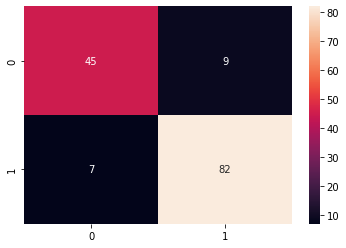

In [58]:
sns.heatmap(matriz_confusao, annot=True);